### Context:
This project is relates to the biotechnology industry. Stem cells are turned into cardiomyocytes (heart muscle cells) in bioreactors in the lab. These cardiomyocytes can then be used for therapeutic purposes for patients to support heart regneration. Various measurements are taken throughout the process of differentation. The aim is to build a model that can use this data to predict whether or not the process will produce a sufficient cardiomyocyte content.

Note that CM refers to cardiomyocytes throughout this project.

You can view files from this project in this order:
* 1_EDA.ipynb (exploratory data analysis)
* 2_comparing_models.ipynb
* 3_model_pipeline.ipynb

### Data source:
Williams, Bianca, et al. "Prediction of human induced pluripotent stem cell cardiac differentiation outcome by multifactorial process modeling." Frontiers in bioengineering and biotechnology 8 (2020): 851.
https://www.frontiersin.org/articles/10.3389/fbioe.2020.00851/full

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
#read in the data
X_train = pd.read_excel('train_data.xlsx')
y_train = pd.read_excel('train_data.xlsx', sheet_name=1)
X_test = pd.read_excel('test_data.xlsx')
y_test = pd.read_excel('test_data.xlsx', sheet_name=1)

#turn response variable 'dd10 CM content' into a binary class and store in new column 'y'
#y is a binary variable where 1 = Insufficient and 0 = Sufficient
y_train['y'] = y_train['dd10 CM Content']<90
y_train['y'] = y_train['y'].astype('int64')
y_test['y'] = y_test['dd10 CM Content']<90
y_test['y'] = y_test['y'].astype('int64')

#join all data into one dataframe
train = X_train.join(y_train)
test = X_test.join(y_test)
df = pd.merge(train, test, how ='outer')

#a column called 'CM_content' has been created that contains category labels
df=df.assign(CM_content=df.y.map({0: "Sufficient", 1: "Insufficient"}))

C:\Users\Avani\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1141: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


In [4]:
print('Features and observations')
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('DataFrame shape: ', df.shape)

print('\nCheck for null values')
print('Missing values: ', df.isnull().sum().sum())

print('\nCheck for imbalanced data')
print(df.y.value_counts())

Features and observations
X_train shape:  (42, 94)
X_test shape:  (18, 94)
DataFrame shape:  (60, 97)

Check for null values
Missing values:  0

Check for imbalanced data
1    41
0    19
Name: y, dtype: int64


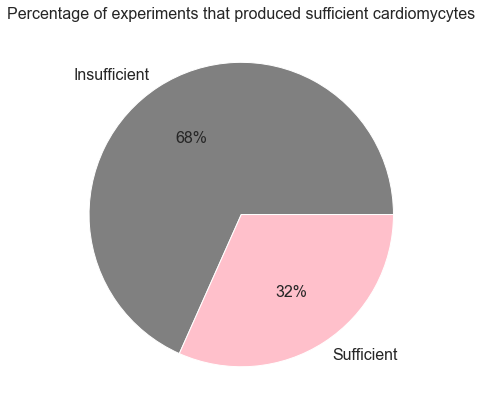

In [5]:
#visualising the percentage of experiments that belong to each category
pie = np.array([41,19])
pie_labels = ["Insufficient", "Sufficient"]
pie_colors = ["grey", "pink"]
plt.figure(figsize=(7,7))
patches, texts, autotexts = plt.pie(pie, labels = pie_labels, colors = pie_colors, autopct='%1.f%%', textprops = {'fontsize':16})
plt.title('Percentage of experiments that produced sufficient cardiomycytes', fontdict={'fontsize': 16})
plt.show()

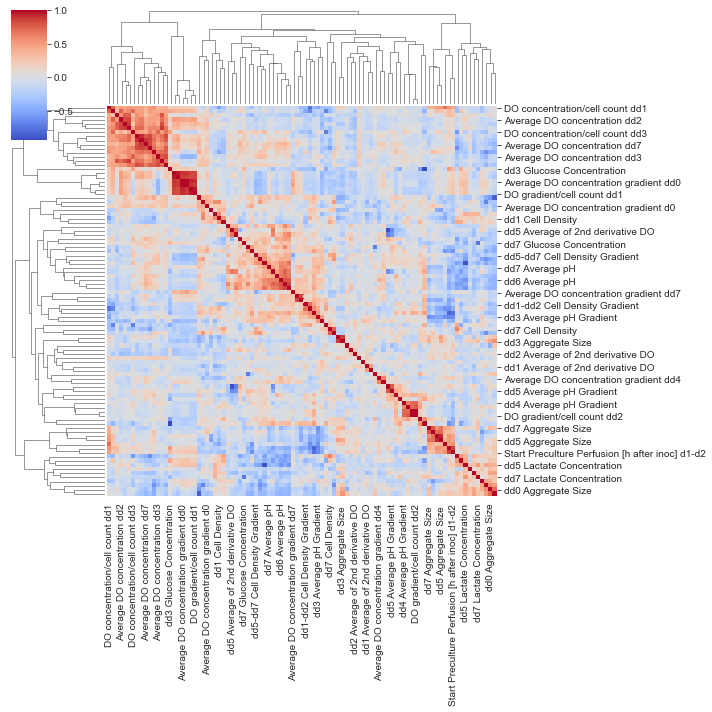

In [6]:
#look at heatmap of correlation
df_corr = df.drop(columns = 'y')
sns.clustermap(df_corr.corr(), cmap = 'coolwarm')

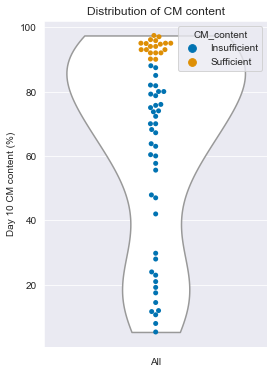

In [7]:
#distribution of sufficient and insufficient CM content
plt.figure(figsize=(4,6))
sns.swarmplot(y=df['dd10 CM Content'], hue=df['CM_content'], x=[""]*len(df), palette='colorblind')
sns.violinplot(y=df['dd10 CM Content'], color='white', inner=None, cut=0)
plt.ylabel('Day 10 CM content (%)')
plt.xlabel('All')
plt.title('Distribution of CM content');

### Visualising process variables across time

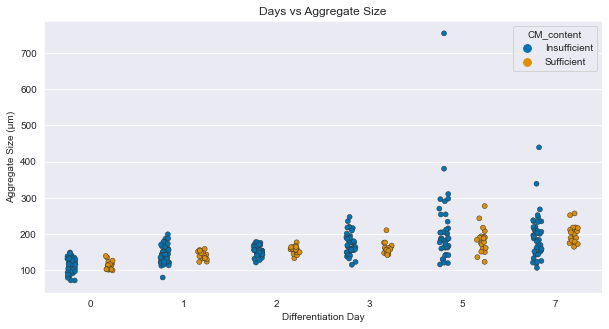

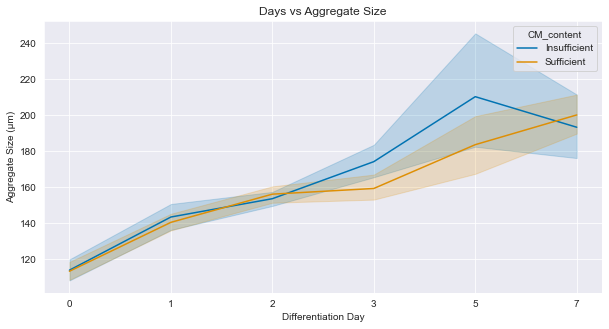

In [8]:
#aggregate size i.e. the size of cell clumps 
agg_size = df[[col for col in df.columns if ('Aggregate Size' in col and 'Gradient' not in col) or col == 'CM_content']]
agg_size.columns = ['0', '1', '2', '3', '5', '7', 'CM_content']
agg_size = pd.melt(agg_size, value_vars = ['0','1','2','3','5','7'], id_vars='CM_content')

plt.figure(figsize=(10,5))
sns.stripplot(data=agg_size, x='variable', y='value', hue='CM_content', dodge=True, linewidth=0.5, palette = 'colorblind')
plt.xlabel('Differentiation Day')
plt.ylabel('Aggregate Size (μm)')
plt.title('Days vs Aggregate Size');

plt.figure(figsize=(10,5))
sns.lineplot(data=agg_size, x='variable', y='value', hue='CM_content', palette = 'colorblind')
plt.xlabel('Differentiation Day')
plt.ylabel('Aggregate Size (μm)')
plt.title('Days vs Aggregate Size');

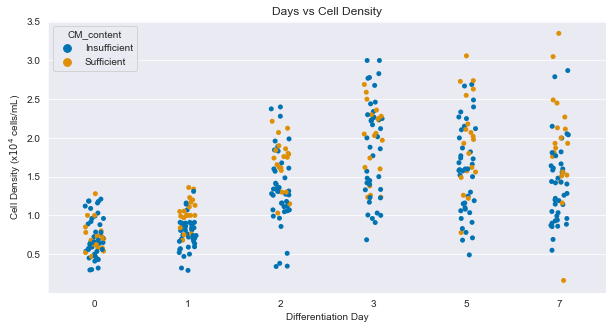

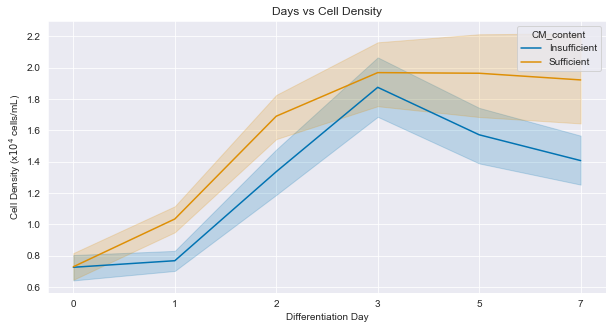

In [9]:
#cell density
density = df[[col for col in df.columns if ('Cell Density' in col and 'Gradient' not in col) or col == 'CM_content']]
density.columns = ['0', '1', '2', '3', '5', '7', 'CM_content']
density = pd.melt(density, value_vars = ['0','1','2','3','5','7'], id_vars='CM_content')

plt.figure(figsize=(10,5))
sns.stripplot(data=density, x='variable', y='value', hue='CM_content', palette = 'colorblind')
plt.xlabel('Differentiation Day')
plt.ylabel('Cell Density (x$10^4$ cells/mL)')
plt.title('Days vs Cell Density');

plt.figure(figsize=(10,5))
sns.lineplot(data=density, x='variable', y='value', hue='CM_content', palette = 'colorblind')
plt.xlabel('Differentiation Day')
plt.ylabel('Cell Density (x$10^4$ cells/mL)')
plt.title('Days vs Cell Density');

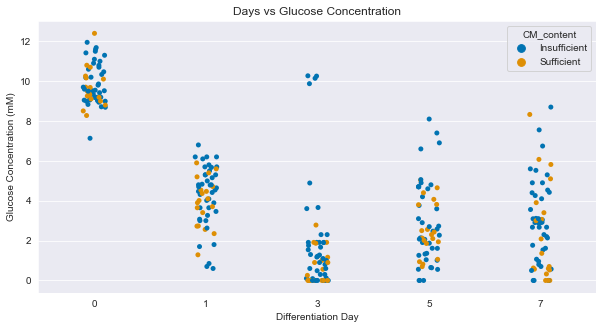

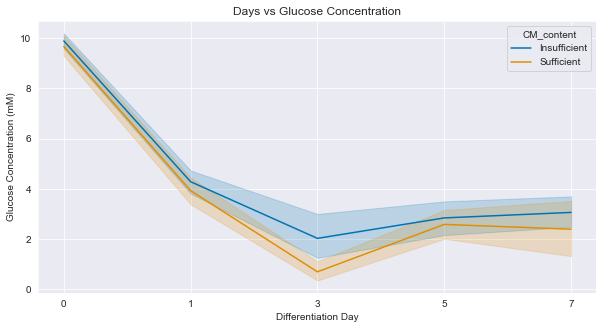

In [10]:
#glucose concentration (cells take in glucose when growing)
glucose = df[[col for col in df.columns if ('Glucose' in col and 'Gradient' not in col) or col == 'CM_content']]
glucose.columns = ['0', '1', '3', '5', '7', 'CM_content']
glucose = pd.melt(glucose, value_vars = ['0','1','3','5','7'], id_vars='CM_content')

plt.figure(figsize=(10,5))
sns.stripplot(data=glucose, x='variable', y='value', hue='CM_content', palette = 'colorblind')
plt.xlabel('Differentiation Day')
plt.ylabel('Glucose Concentration (mM)')
plt.title('Days vs Glucose Concentration');

plt.figure(figsize=(10,5))
sns.lineplot(data=glucose, x='variable', y='value', hue='CM_content', palette = 'colorblind')
plt.xlabel('Differentiation Day')
plt.ylabel('Glucose Concentration (mM)')
plt.title('Days vs Glucose Concentration');

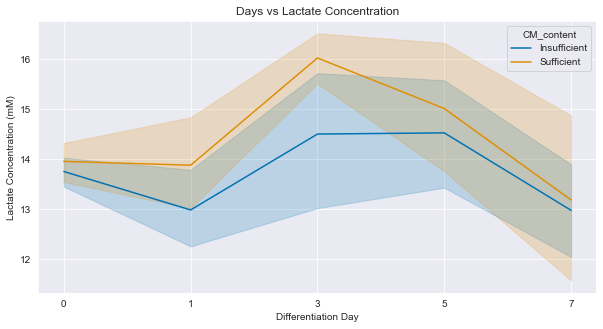

In [11]:
#lactate concentration (lactate is a waste product released by cells)
lactate = df[[col for col in df.columns if ('Lactate' in col and 'Gradient' not in col) or col == 'CM_content']]
lactate.columns = ['0', '1', '3', '5', '7', 'CM_content']
lactate = pd.melt(lactate, value_vars = ['0','1','3','5','7'], id_vars='CM_content')
plt.figure(figsize=(10,5))
sns.lineplot(data=lactate, x='variable', y='value', hue='CM_content', palette = 'colorblind')
plt.xlabel('Differentiation Day')
plt.ylabel('Lactate Concentration (mM)')
plt.title('Days vs Lactate Concentration');

C:\Users\Avani\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


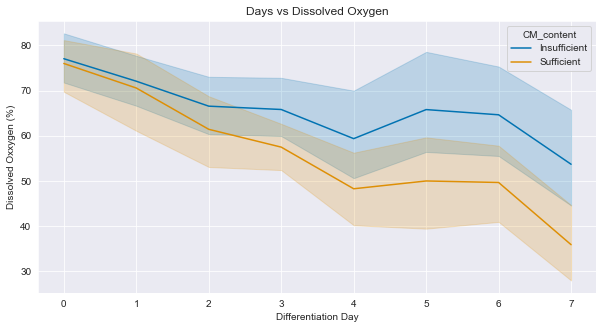

In [12]:
#dissolved oxygen
oxygen = df[[col for col in df.columns if ('DO' in col and 'gradient' not in col and 'derivative' not in col and 'cell' not in col) or col == 'CM_content']]
oxygen.drop(labels=["Average DO concentration d0", "Average DO concentration d1"], axis=1, inplace=True)
oxygen.columns = ['0', '1', '2','3','4', '5','6', '7', 'CM_content']
oxygen = pd.melt(oxygen, value_vars = ['0', '1', '2','3','4', '5','6', '7'], id_vars='CM_content')
plt.figure(figsize=(10,5))
sns.lineplot(data=oxygen, x='variable', y='value', hue='CM_content', palette = 'colorblind')
plt.xlabel('Differentiation Day')
plt.ylabel('Dissolved Oxxygen (%)')
plt.title('Days vs Dissolved Oxygen');

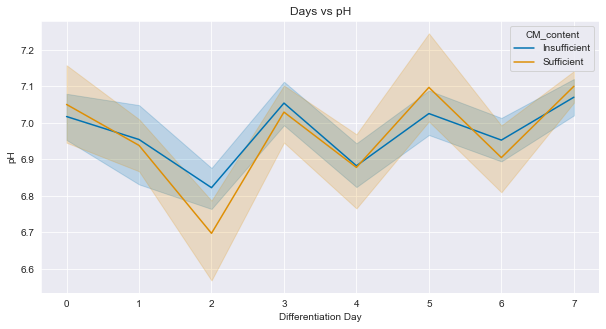

In [13]:
#pH
ph = df[[col for col in df.columns if ('pH' in col and 'Gradient' not in col) or col == 'CM_content']]
ph = ph.iloc[:,3:]
ph.columns = ['0', '1', '2','3','4', '5','6', '7', 'CM_content']
ph = pd.melt(ph, value_vars = ['0', '1', '2','3','4', '5','6', '7'], id_vars='CM_content')
plt.figure(figsize=(10,5))
sns.lineplot(data=ph, x='variable', y='value', hue='CM_content', palette = 'colorblind')
plt.xlabel('Differentiation Day')
plt.ylabel('pH')
plt.title('Days vs pH');

### Top features correlated with day 10 CM content

In [14]:
df.corr()['dd10 CM Content'].abs().nlargest(n=7)

dd10 CM Content                  1.000000
y                                0.647628
dd1 Cell Density                 0.535771
dd7 Cell Density                 0.448900
dd5 Cell Density                 0.444682
dd3-dd5 Cell Density Gradient    0.417264
dd1-dd2 Cell Density Gradient    0.370556
Name: dd10 CM Content, dtype: float64

### Top features important for model prediction
I looked further into the top 3 features that were identified as important for prediction of the random forest model. The model that I am referring to can be found as 'best_randomforest.joblib'. For details on how the model was produced, see '2_comparing_models.ipynb'.
The top 3 features were:
* Presence of  IWP2 (hours) - this is a small molecule that is added in the bioreactor and is known to help stem cells turn into cardiomyocytes
* Day 2 average pH
* Day 3 average of 2nd derivative of dissolved oxygen

              Presence of  IWP2 [h]
CM_content                         
Insufficient              46.962927
Sufficient                48.000000


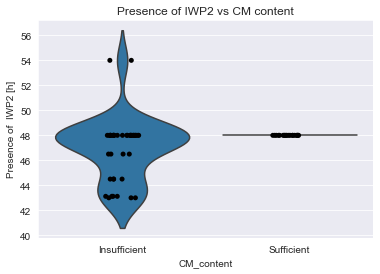

In [15]:
#IWP2
iwp2 = df[[col for col in df.columns if col=='Presence of  IWP2 [h]' or col == 'CM_content']]
print(iwp2.groupby('CM_content').mean())
sns.violinplot(data=iwp2, x='CM_content', y='Presence of  IWP2 [h]', inner=None)
sns.stripplot(data=iwp2, x='CM_content', y='Presence of  IWP2 [h]', color='black')
plt.title('Presence of IWP2 vs CM content');
#this shows that all sufficient outcomes involved using IWP2 for 48 hours

              dd2 Average pH
CM_content                  
Insufficient        6.822413
Sufficient          6.697319


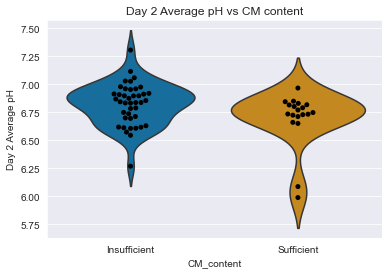

In [16]:
#day 2 average pH
dd2ph = df[[col for col in df.columns if col=='dd2 Average pH' or col == 'CM_content']]
print(dd2ph.groupby('CM_content').mean())
sns.violinplot(data=dd2ph, x='CM_content', y='dd2 Average pH', palette = 'colorblind', inner=None)
sns.swarmplot(data=dd2ph, x='CM_content', y='dd2 Average pH', color='black')
plt.ylabel('Day 2 Average pH')
plt.title('Day 2 Average pH vs CM content');
#average pH is slightly lower for sufficient outcome

              dd3 Average of 2nd derivative DO
CM_content                                    
Insufficient                        -62.401515
Sufficient                         -155.458291


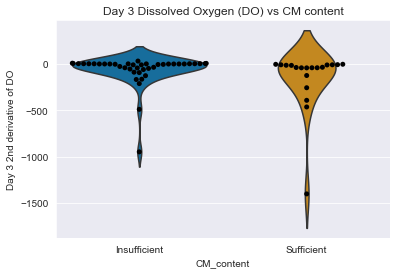

In [17]:
#day 3 average of 2nd derivative dissolved oxygen
#The 2nd derivative tells us how fast something is accelerating or decelerating. It tells us how rapidly the dissolved oxygen level is changing.
d3DOd = df[[col for col in df.columns if col=='dd3 Average of 2nd derivative DO' or col == 'CM_content']]
print(d3DOd.groupby('CM_content').mean())
sns.violinplot(data=d3DOd, x='CM_content', y='dd3 Average of 2nd derivative DO', palette = 'colorblind', inner=None)
sns.swarmplot(data=d3DOd, x='CM_content', y='dd3 Average of 2nd derivative DO', color='black')
plt.ylabel('Day 3 2nd derivative of DO')
plt.title('Day 3 Dissolved Oxygen (DO) vs CM content');
#dissolved oxygen may be decreasing faster in 'sufficient' category. However this is quite variable



### See '2_comparing_models.ipynb' next for machine learning models, feature selection, and model evaluation.